# LP Modes
The modes of hollow core photonic crystal fibers (HCPCFs) can be approximated as linear polarized ($LP_{nm}$) modes.

\begin{equation}
\begin{split}
LP_{mn}^{j}(r, \phi, z) \vec{p} & = E_{0} J_{m}\left( \frac{u_{mn} r}{r_{co}} \right) \cos \left(n \phi - j \frac{\pi}{2} \right) e^{-i \beta_{mn}z} \vec{p}\\
& = E_{0} \epsilon_{mn}(r, \phi) e^{-i \beta_{mn}z}\vec{p}
\end{split}
\end{equation}


The $LP_{01}$ mode is primarily excited in the HCPCF when coupled to a free-space Gaussian beam but misalignments result in minute excitations of the first excited $LP_{11}$ mode. Note that j=0 corresponds to orienting the first excoted mode to the x axis and j=1 corresponds to orienting it along the y axis. Unless active mode stabilisation is employed, it will appear as a superposition of j=0 and j=1.

### $LP_{01}$ and $LP_{11}$ Modes plotted in the radial and transverse planes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn_zeros, jv
from matplotlib.colors import TwoSlopeNorm


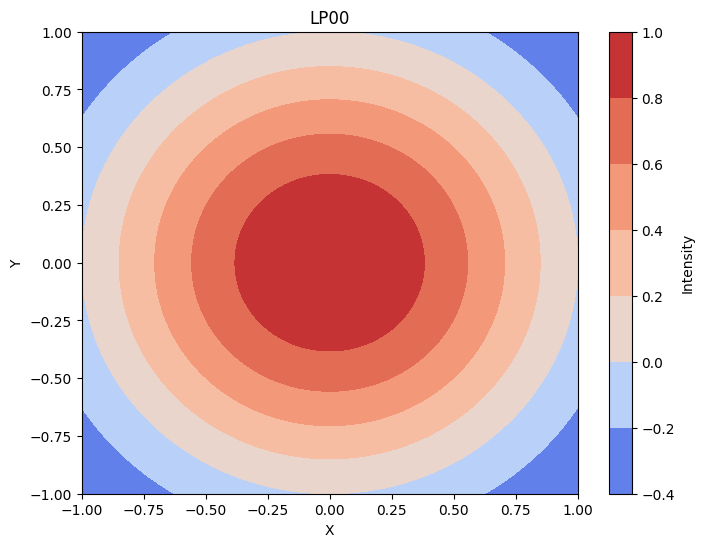

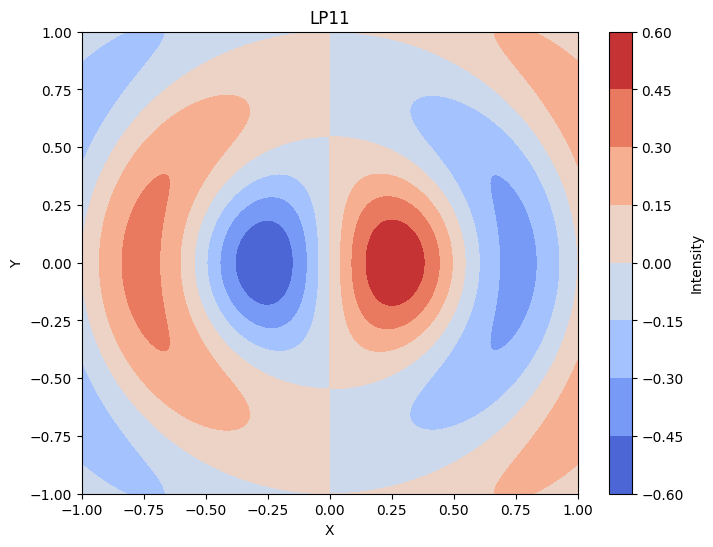

In [3]:
# radial/transverse plane - equivalent to just plotting epsilon and setting z = 0 (or some other constant, but 0 is easiest)
r_co = 1

def epsilon(r,phi,m,n,j=0):
    # r = np.sqrt(x**2 + y**2)
    # phi = np.arctan(y/x)
    u_mn = jn_zeros(m,n+1)[n]
    besselarg = (u_mn*r)/(r_co)
    return jv(m, besselarg) * np.cos(n * phi - j * (np.pi / 2))

x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Phi = np.arctan2(Y, X)

for m,n in [0,0],[1,1]:

    Z = epsilon(R,Phi,m,n)

    v_min, v_max = Z.min(), Z.max()

    plt.figure(figsize=(8, 6))
    norm = TwoSlopeNorm(vcenter=0, vmax=v_max)
    contour = plt.contourf(X, Y, Z, cmap='coolwarm', norm=norm)
    plt.title('LP{}{}'.format(m, n))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(contour, label='Intensity')
    plt.show()

    # soooooo it should be plotting the LP01 and LP11 modes but for some reason the LP00 mode looks how
    # the LP01 mode should look and the LP00 mode doesnt even exist so idk what's going on here but I'll
    # take it I guess

C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


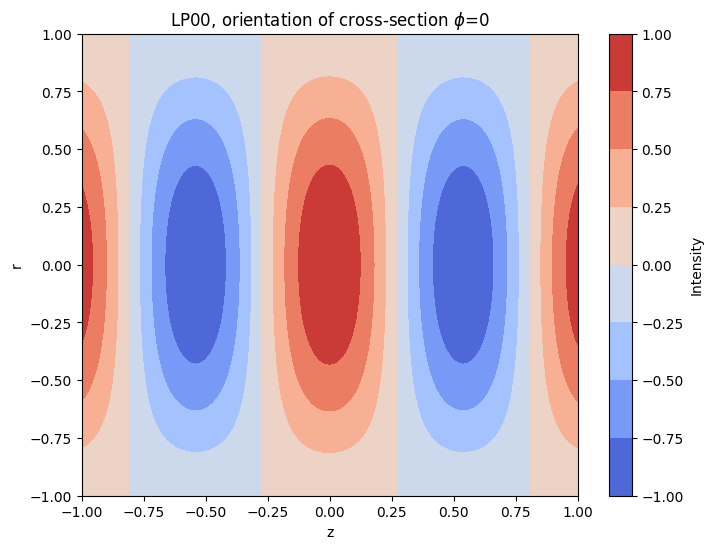

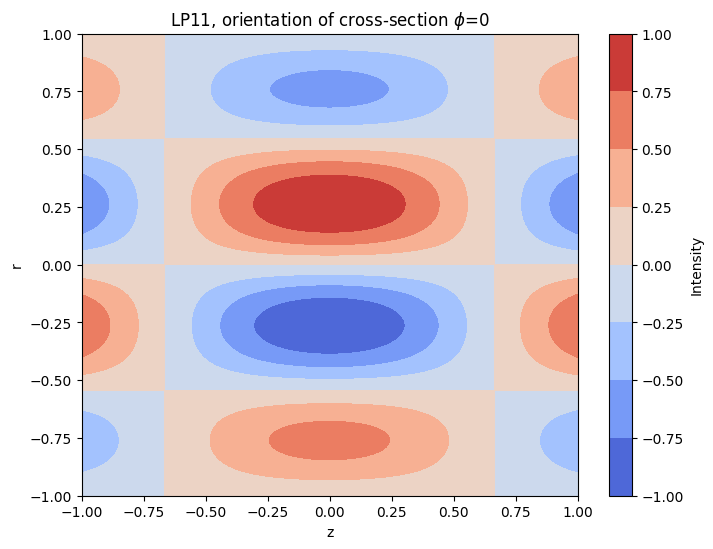

In [4]:
# In the axial/longitudinal plane. This time, epsilon is multiplied by some oscillating value dependent on
# z and will also vary depending on the "slice" we take relative to directly down the centre

# SET WAVELENGTH AND CORE RADIUS AND RUN FROM HERE #########
wavelength = 1
r_co = 1

omega = 2*np.pi*3e8/wavelength
###############################################

def beta(m,n,lam=wavelength):
    u_mn = jn_zeros(m,n+1)[n]
    return (2*np.pi/lam) * ( 1 - 0.5*( (u_mn*lam)/(2*np.pi*r_co) )**2 )
    

def LP(z,r,phi,E0,m,n,j=0,lam=wavelength,dir='right'):
    eps = epsilon(r,phi,m,n,j) # returns an array
    bet = beta(m,n,lam) # returns a number
    if dir == 'right':
        result = E0*eps*np.exp(-1j*bet*z)
    elif dir =='left':
        result = E0*eps*np.exp(1j*bet*z)
    return result/np.max(result)

r = np.linspace(-1,1,1000)
z = np.linspace(-1,1,1000)

R,Z = np.meshgrid(r,z)

# to take just a "slice", set phi constant (I'll set it as either 0 or np.pi/2 depending on the cross section
# I want)
phi = 0

for m,n in [0,0],[1,1]:

    F = LP(Z,R,phi,1,m,n)

    v_min, v_max = F.min(), F.max()

    plt.figure(figsize=(8, 6))
    #norm = TwoSlopeNorm(vcenter=0, vmax=v_max)
    contour = plt.contourf(Z, R, F, cmap='coolwarm')#, norm=norm)
    plt.title('LP{}{}, orientation of cross-section $\phi$={}'.format(m, n,phi))
    plt.xlabel('z')
    plt.ylabel('r')
    plt.colorbar(contour, label='Intensity')
    plt.show()


# Creating a standing wave pattern viewed from a longitudinal and transverse cross section

- For Transverse plane (at some z=const) use r= $-1 \rightarrow 1$, $\phi= 0 \rightarrow 2 \pi$ and z= const
- For Longitudinal plane (at some r=const) use r= $-1 \rightarrow 1$, $\phi$= const, z= $-1 \rightarrow 1$

Let's say that we perfectly align and excite only the fundamental mode each direction in the fiber. We have:

\begin{equation}
    E(r, \phi, z) = E_{0 \rightarrow} \epsilon_{00} e^{-i \beta_{\rightarrow} z} + E_{0 \leftarrow} \epsilon_{00} e^{i \beta_{\leftarrow} z}
\end{equation}

in the thesis they say that the fundamental and excited modes are excited in one direction only and that in the opposite direction only the fundamental mode is excited. idk why this is
I will also multiply the modes by an oscillating time term $e^{i \omega t}$ because they are propagating.

In [5]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
import os,time

# create folder to store images to make movie from
movies_directory=r"C:\Users\marku\Desktop\movies"
timestr = time.strftime("%Y%m%d-%H%M%S")
foldername = timestr+'_movie'
folderpath = os.path.join(movies_directory,foldername)
os.mkdir(folderpath)

print(folderpath + 'created')
# time increments should be quite small to get good quality video
times = np.linspace(0,50,50)
delta = 1

# right travelling wave
E0r_1 = 1
E0r_2 = 1 # dont set these to 0 bc function cant handle yet
lamr = 0.4
betar = beta(0,0,lamr)

# left travelling wave
E0l_1 = 1
E0l_2 = 1 # dont set these to 0 bc function cant handle yet
laml=0.4
betal = beta(0,0,laml)


# Total (Longitudinal)
r = np.linspace(-2,2,1000)
z = np.linspace(-5,5,1000)
R,Z = np.meshgrid(r,z)
phi = 0
omega_no_units = 2*np.pi/wavelength

# set colorbar limits so its the same for all of them
# for E field, -2,+2 ; cmap 'coolwarm
# for intensity, 0,+4 ; cmap 'YlOrBr' ***and remember to change I_tot to be squared or not and the label and cmap***
vmin = 0
vmax = 4


for t in times:
    Er_1 = 1*LP(Z, R, phi, E0r_1, 0, 0, 0, lamr, 'right')*np.exp(1j*omega_no_units*t)
    Er_2 = 0.1*LP(Z, R, phi, E0r_2, 1, 1, 0, lamr, 'right')*np.exp(1j*omega_no_units*t) # set to 0 here
    El_1 = 1*LP(Z, R, phi, E0l_1, 0, 0, 0, laml, 'left')*np.exp(1j*(omega_no_units+delta)*t)
    El_2 = 0#LP(Z, R, phi, E0l_2, 1, 1, 0, laml, 'left') # set to 0 here



    E_tot = Er_1 + El_1 + Er_2 + El_2
    I_tot = E_tot * np.conj(E_tot)
    #I_tot = I_tot/np.max(I_tot)

    plt.figure(figsize=(8, 6))
    contour = plt.contourf(Z, R, I_tot, cmap='YlOrBr', vmin=vmin, vmax=vmax)
    plt.axhline(y=r_co, color='black', linestyle='--')
    plt.axhline(y=-r_co, color='black', linestyle='--')
    plt.axvline(x=0, color='blue', linestyle='--')
    plt.xlabel('z')
    plt.ylabel('r')
    cbar = plt.colorbar(contour, label='Electric field intensity')
    plt.title('t={:2f}'.format(t))
    filename='t={:2f}'.format(t) +'.png'
    plt.savefig(os.path.join(folderpath,filename))
    plt.close() # dont display all the figures lol



C:\Users\marku\Desktop\movies\20240912-110230_moviecreated


The above plot is the instantaneous intensity taken at some t=fixed and just squaring the absolute magnitude of the Electric field. If t were allowed to increase, the mode would flash alternately and the average taken of this would yield a smoother plot like the one in David's thesis. We can see that even just weakly exciting the second mode in both directions yields modulations in the path of the particle.

# Play the video in real time

In [6]:
import os
import cv2
from natsort import natsorted

# Set the folder path and output video file name
folder_path =r"C:\Users\marku\Desktop\Code\movies\20240807-132103_movie"
frame_rate = 5 # Set the frame rate
output_video_path = os.path.join(folder_path,'output_movie_{}fps.mp4'.format(frame_rate))

# Get list of all PNG files in the folder and sort them with natsorted
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
sorted_files = natsorted(image_files)

# Read the first image to get the frame size
first_image_path = os.path.join(folder_path, sorted_files[0])
frame = cv2.imread(first_image_path)
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))


for file in sorted_files:
    img_path = os.path.join(folder_path, file)
    img = cv2.imread(img_path)
    video.write(img)


video.release()
print(f'Movie created successfully: {output_video_path}')


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\marku\\Desktop\\Code\\movies\\20240807-132103_movie'

# Diverging Beams from fiber end
------
Here are my building blocks

C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\marku\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


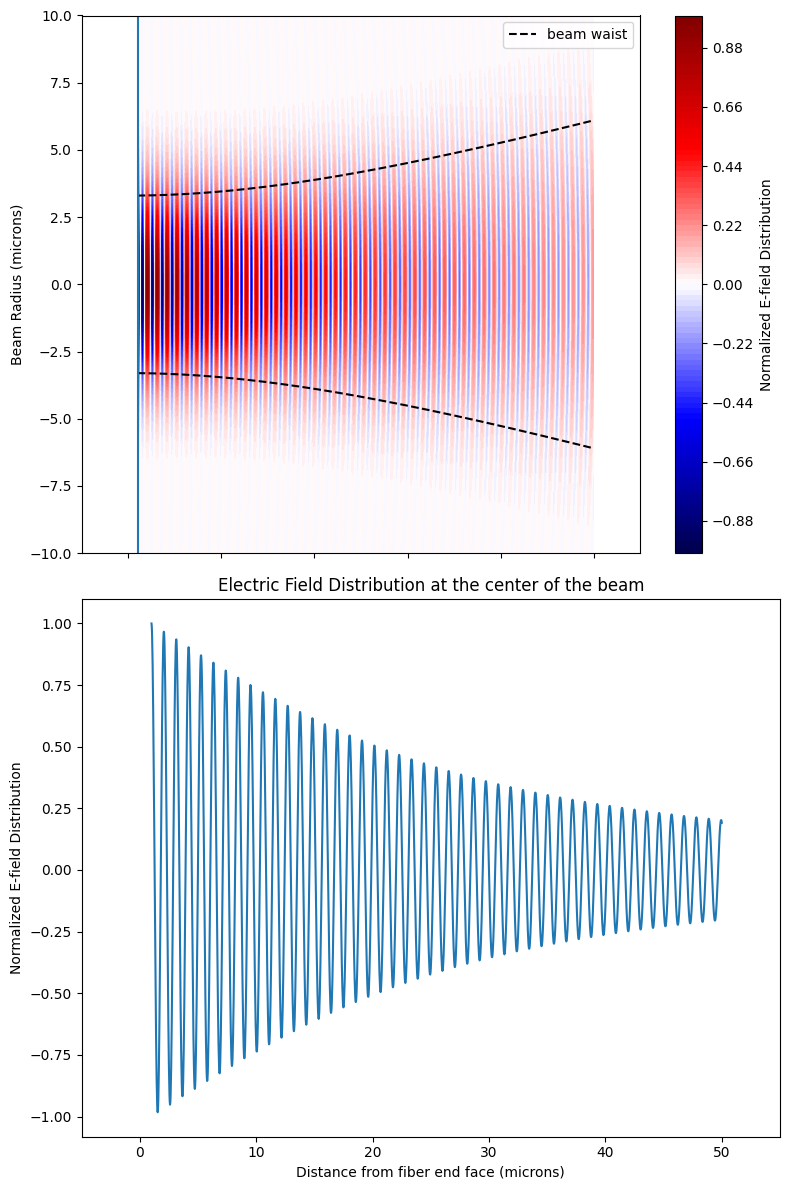

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# diverging beam waist:
def RayleighRange(wavelength, MFD):
    return (np.pi/wavelength)*(MFD/2)**2

def BeamRadius(z, wavelength, MFD, offset=0):
    # input in microns, output in microns
    zr = RayleighRange(wavelength, MFD)
    return (MFD/2)*np.sqrt(1 + ((z-offset)/zr)**2)

def RadCurve(z, wavelength, MFD, offset=0):
    zr = RayleighRange(wavelength, MFD)
    return (z-offset)*(1+ (zr/(z-offset))**2)

def GouyPhase(z, wavelength, MFD, offset=0):
    zr = RayleighRange(wavelength, MFD)
    return np.arctan((z-offset)/zr)

def ElectricField(z, r, wavelength, MFD, offset=0, dir='right'):
    if dir=='right':
        BR = BeamRadius(z-offset, wavelength, MFD, offset)
        RC = RadCurve(z-offset, wavelength, MFD, offset)
        psi = GouyPhase(z-offset, wavelength, MFD, offset)
        k = 2*np.pi/wavelength
        E = ( (MFD/2)/BR ) * ( np.exp(-(r**2/BR**2)) ) * np.exp( -1j*( k*(z-offset) + (k*r**2)/(2*RC) ) - psi )

    elif dir=='left':
        BR = BeamRadius(-z-offset, wavelength, MFD)
        RC = RadCurve(-z-offset, wavelength, MFD)
        psi = GouyPhase(-z-offset, wavelength, MFD)
        k = 2*np.pi/wavelength
        E = ( (MFD/2)/BR ) * ( np.exp(-(r**2/BR**2)) ) * np.exp( -1j*( k*(-z-offset) + (k*r**2)/(2*RC) ) - psi )

    # input in microns, output normalised E-field intensity in micron scale space
    return E/np.max(E)


############## right travelling field ########################
# Everything in microns
offset_right = 1
zs = np.linspace(offset_right, 50, 2000)
rs = np.linspace(-10, 10, 2000)
wavelength = 1064e-3  # Wavelength in microns
MFD = 6.6  # Mode Field Diameter in microns



Z, R = np.meshgrid(zs, rs)

E_field_right = ElectricField(Z, R, wavelength, MFD, offset_right, 'right')  # Use intensity, |E|^2
Beam_radius = BeamRadius(zs, wavelength, MFD)
r_zero_index = np.argmin(np.abs(rs))
Intensity_dropoff = E_field_right[r_zero_index, :]


fig, axes = plt.subplots(2,1,figsize=(8,12),sharex=True)


contour = axes[0].contourf(Z, R, E_field_right, levels=100, cmap='seismic')
fig.colorbar(contour, ax=axes[0], label='Normalized E-field Distribution')
axes[0].plot(zs, Beam_radius, linestyle='--', color='black', label='beam waist')
axes[0].plot(zs, -Beam_radius, linestyle='--', color='black')
axes[0].axvline(offset_right)

axes[0].set_ylabel('Beam Radius (microns)')
axes[0].set_xlim(-5,55)
axes[0].set_ylim(-10,10)
axes[0].legend()



axes[1].plot(zs, Intensity_dropoff)
axes[1].set_ylabel('Normalized E-field Distribution')
axes[1].set_xlabel('Distance from fiber end face (microns)')
axes[1].set_title('Electric Field Distribution at the center of the beam')
#axes[1].set_xlim(0,30)


plt.tight_layout()
plt.show()




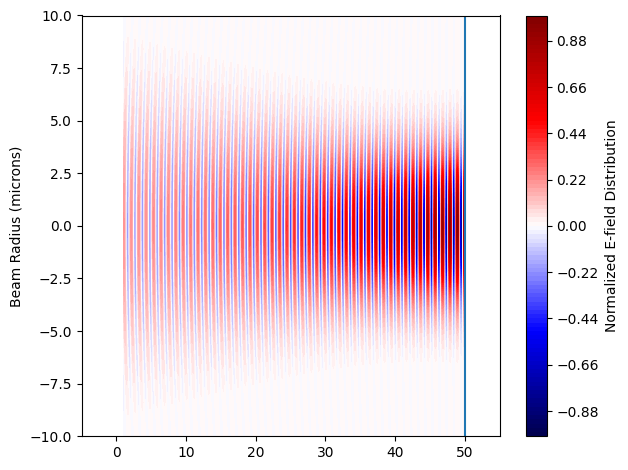

In [8]:
############## left travelling field ######################## idk what am doing lol
# Everything in microns
offset_left = -49
zs = np.linspace(1,50, 2000)
rs = np.linspace(-10, 10, 2000)
wavelength = 1064e-3  # Wavelength in microns
MFD = 6.6  # Mode Field Diameter in microns



Z, R = np.meshgrid(zs, rs)

E_field_left = ElectricField(offset_left-Z, R, wavelength, MFD, offset_left, 'right')  # Use intensity, |E|^2

fig, ax = plt.subplots()

contour = ax.contourf(Z, R, E_field_left, levels=100, cmap='seismic')
fig.colorbar(contour, ax=ax, label='Normalized E-field Distribution')
ax.axvline(-offset_left+1)

ax.set_ylabel('Beam Radius (microns)')
ax.set_xlim(-5,55)
ax.set_ylim(-10,10)

plt.tight_layout()
plt.show()



C:\Users\marku\AppData\Local\Temp\ipykernel_47204\1873188785.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


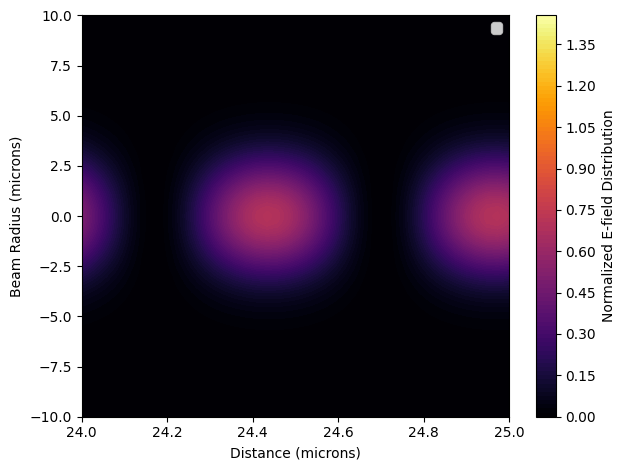

In [15]:
# add them together to make the standing wave!!

total_field = np.abs(E_field_right + E_field_left)**2
zs = np.linspace(1, 50, 2000)
rs = np.linspace(-10, 10, 2000)

Z,R = np.meshgrid(zs,rs)

fig, ax = plt.subplots()


contour1 = ax.contourf(Z,R, total_field, levels=100, cmap='inferno')
fig.colorbar(contour1, ax=ax, label='Normalized E-field Distribution')
ax.axvline(offset_left)
ax.axvline(offset_right)

ax.set_ylabel('Beam Radius (microns)')
ax.set_xlabel('Distance (microns)')
ax.set_xlim(24,25)
ax.set_ylim(-10,10)
ax.legend()

plt.tight_layout()
plt.show()


### Now make it into functions where the parameters like distance between fibers, lateral offset, etc can be input

In [ ]:
def FreeSpaceStandingWave():